# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [115]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy.ndimage.filters import gaussian_filter
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [99]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

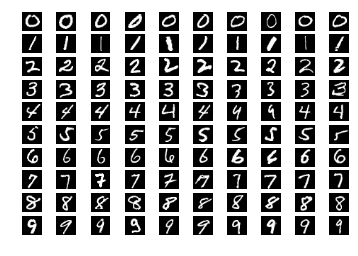

In [40]:
def P1(num_examples=10):

### STUDENT START ###
    zero,one,two,three,four,five,six,seven,eight,nine = [],[],[],[],[],[],[],[],[],[]

    for ix, num in enumerate(mini_train_labels):
        if num == 0 and len(zero) < 10:
            zero.append(mini_train_data[ix])
        elif num == 1 and len(one) < 10:
            one.append(mini_train_data[ix])
        elif num == 2 and len(two) < 10:
            two.append(mini_train_data[ix])
        elif num == 3 and len(three) < 10:
            three.append(mini_train_data[ix])
        elif num == 4 and len(four) < 10:
            four.append(mini_train_data[ix])
        elif num == 5 and len(five) < 10:
            five.append(mini_train_data[ix])
        elif num == 6 and len(six) < 10:
            six.append(mini_train_data[ix])
        elif num == 7 and len(seven) < 10:
            seven.append(mini_train_data[ix])
        elif num == 8 and len(eight) < 10:
            eight.append(mini_train_data[ix])
        elif num == 9 and len(nine) < 10:
            nine.append(mini_train_data[ix])

    ten_by_ten = zero + one + two + three + four + five + six + seven + eight + nine

    for ix, data in enumerate(ten_by_ten):
        pixels = ten_by_ten[ix]
        pixels = pixels.reshape((28,28))
        plt.subplot(10,10,ix+1)
        plt.axis('off')
        plt.imshow(pixels, cmap='gray')

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [64]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(mini_train_data,mini_train_labels)
        knn_pred = knn.predict(dev_data)
        if k == 1:
            print 'Accuracy of k = 1: \n', classification_report(dev_labels, knn_pred, digits=2)
        else:
            print 'Accuracy of k = ', k, ': ', knn.score(dev_data,dev_labels)

    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy of k = 1: 
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy of k =  3 :  0.878
Accuracy of k =  5 :  0.869
Accuracy of k =  7 :  0.865
Accuracy of k =  9 :  0.863


ANSWER: For k=1 the most difficult digit to classify accurately is 3. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [66]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for s in train_sizes:
        start_time = time.time()
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(train_data[:s],train_labels[:s])
        knn_pred = knn.predict(dev_data)
        elapsed_time = time.time() - start_time
        score = knn.score(dev_data,dev_labels)
        accuracies.append([s,score])
        print 'Accuracy of train size: ', s, ': ', score
        print 'Prediction time: ', int(elapsed_time), ' seconds \n'

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Accuracy of train size:  100 :  0.72
Prediction time:  0  seconds 

Accuracy of train size:  200 :  0.786
Prediction time:  0  seconds 

Accuracy of train size:  400 :  0.841
Prediction time:  0  seconds 

Accuracy of train size:  800 :  0.884
Prediction time:  1  seconds 

Accuracy of train size:  1600 :  0.902
Prediction time:  2  seconds 

Accuracy of train size:  3200 :  0.926
Prediction time:  4  seconds 

Accuracy of train size:  6400 :  0.937
Prediction time:  8  seconds 

Accuracy of train size:  12800 :  0.959
Prediction time:  18  seconds 

Accuracy of train size:  25000 :  0.97
Prediction time:  38  seconds 



(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [78]:
def P4():

### STUDENT START ###
    X = [item[0] for item in accuracies]
    X = np.matrix(X).transpose()
    y = [item[1] for item in accuracies]
    lr = LinearRegression(fit_intercept=True)
    lr.fit(X,y)
    print 'Linear regression accuracy prediction for n=60000 training size: ',lr.predict(60000)
    
    #Attempt a polynomial transformation
    '''poly = PolynomialFeatures(degree=2, include_bias=False)
    X2 = poly.fit_transform(X)
    lr2 = LinearRegression(fit_intercept=True)
    lr2.fit(X2,y)
    print 'Polynomial transformation prediction for n=60000 training size: ',lr2.predict(60000)'''

### STUDENT END ###

P4()

Linear regression accuracy prediction for n=60000 training size:  [ 1.24307226]


ANSWER: Regression prediction for n=60000: 1.24
This is a problem as it has predicted an accuracy of greater than 100%. 
Applying a polynomial transformation would improve the prediction. (code has been added above for a polynomial transformation, however the required package was not included as approved package) 

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [84]:
def P5():

### STUDENT START ###
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data,mini_train_labels)
    knn_pred = knn.predict(dev_data)
    con_mat = confusion_matrix(dev_labels, knn_pred)
    print con_mat
    print '''\nThe most confused pair of digits for a 1-NN model is 4 and 9. For example, the model erroneously predicted 
        14 times that the digit was 9 when it was actually 4. Similarily, the model erroneously predicted that the 
        digit was 4 when it was actually 9.
            '''
    
### STUDENT END ###

P5()

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

The most confused pair of digits for a 1-NN model is 4 and 9. For example, the model erroneously predicted 
        14 times that the digit was 9 when it was actually 4. Similarily, the model erroneously predicted that the 
        digit was 4 when it was actually 9.
            


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [116]:
def P6():
    
### STUDENT START ###
    #Training data but not Dev
    knn = KNeighborsClassifier(n_neighbors=1)
    smoothed_train_data = gaussian_filter(mini_train_data, sigma=8)
    smoothed_train_labels = gaussian_filter(mini_train_labels, sigma=8)
    knn.fit(smoothed_train_data,smoothed_train_labels)
    score = knn.score(dev_data,dev_labels)
    print 'Smoothed training data but not dev score: ', score
    
    #Dev data but not Training
    knn2 = KNeighborsClassifier(n_neighbors=1)
    smoothed_dev_data = gaussian_filter(dev_data, sigma=8)
    smoothed_dev_labels = gaussian_filter(dev_labels, sigma=8)
    knn2.fit(mini_train_data,mini_train_labels)
    score2 = knn2.score(smoothed_dev_data,smoothed_dev_labels)
    print 'Smoothed dev data but not training score: ', score2
    
    #Both Dev data and Training 
    knn3 = KNeighborsClassifier(n_neighbors=1)
    knn3.fit(smoothed_train_data,smoothed_train_labels)
    score3 = knn3.score(smoothed_dev_data,smoothed_dev_labels)
    print 'Smoothed dev data but not training score: ', score3
    
### STUDENT END ###

P6()

ValueError: Can't handle mix of multiclass and continuous

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [101]:
                
def digit_mapping(data_set):
    for digit in data_set:
        #replace numpy array values in place
        digit[digit>.5] = 2
        digit[digit==0] = 10
        digit[digit<=.5] = 1
        digit[digit==10] = 0

def P7():

### STUDENT START ###
    #binary pixel values
    nb = BernoulliNB(binarize=0.0)
    nb.fit(mini_train_data, mini_train_labels)
    score = nb.score(dev_data,dev_labels)
    print 'Niave Bayes accuracy on binary pixel values: ', score

    #white, grey, or black pixel values
    mapped_train_data = mini_train_data
    mapped_dev_data = dev_data
    digit_mapping(mapped_train_data)
    digit_mapping(mapped_dev_data)
    mnb = MultinomialNB()
    mnb.fit(mapped_train_data, mini_train_labels)
    score = mnb.score(mapped_dev_data,dev_labels)
    print 'Niave Bayes accuracy on multi valued (white, grey, and black) pixel values: ', score
    
### STUDENT END ###

P7()

Niave Bayes accuracy on binary pixel values:  0.805
Niave Bayes accuracy on multi valued (white, grey, and black) pixel values:  0.783


ANSWER: No, using a multi-class representation of the pixel values does not help improve the accuracy. This is due to overfitting because we are training the model on a small number of data points. I would hypothesize that increasing the training data size would reverse the effect (multinomial model has better accuracy). 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [106]:
def P8(alphas):

### STUDENT START ###
    nb = BernoulliNB(binarize=0.0)
    gcv = GridSearchCV(nb, alphas, cv=10)
    gcv.fit(mini_train_data, mini_train_labels)
    print gcv.best_params_
    print gcv.grid_scores_


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

{'alpha': 0.0001}
[mean: 0.09000, std: 0.00277, params: {'alpha': 0.0}, mean: 0.82800, std: 0.04901, params: {'alpha': 0.0001}, mean: 0.82700, std: 0.05068, params: {'alpha': 0.001}, mean: 0.82600, std: 0.05166, params: {'alpha': 0.01}, mean: 0.82300, std: 0.04956, params: {'alpha': 0.1}, mean: 0.82100, std: 0.04539, params: {'alpha': 0.5}, mean: 0.81600, std: 0.04860, params: {'alpha': 1.0}, mean: 0.80800, std: 0.04330, params: {'alpha': 2.0}, mean: 0.78100, std: 0.03330, params: {'alpha': 10.0}]


ANSWER: .0001 is the best value for alpha. When alpha is 0, the accuracy is .09 which is what I would expect. An alpha value of zero means that we need to be 100% confident. This is going to have a very large impact on accuracy. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [114]:
def P9():

### STUDENT END ###

    #Vanilla Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    print(gnb.sigma_)
    print(gnb.theta_)
    print(gnb.score(dev_data, dev_labels))
    
    
    #Improved Gaussian Naive Bayes

    #gnb2.set_params()
    gnb2.predict_log_proba(dev_data)
    gnb2 = GaussianNB()
    gnb2.fit(mini_train_data, mini_train_labels)
    print(gnb2.score(dev_data, dev_labels))
    

### STUDENT END ###

gnb = P9()

[[  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 [  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 [  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 ..., 
 [  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 [  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 [  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
0.583


TypeError: object() takes no parameters

ANSWER: There are a couple steps we can take to improve the model accuracy. Using a transformation such as taking the log will enable the data to fit a normal distribution. Also, Laplace smoothing will have a beneficial effect on the accuracy of the model.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

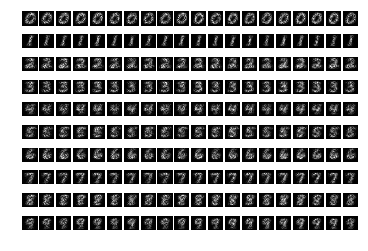

In [136]:
def P10(num_examples):

### STUDENT START ###
    nb = BernoulliNB(binarize=0.0)
    nb.fit(mini_train_data, mini_train_labels)
    fea_prob = nb.feature_log_prob_
    fea_prob = np.exp(fea_prob)

    rn=[]
    for t in range(20):
        rns = []
        for s in range(784):
            rns.append(np.random.rand())
        rn.append(rns)

    ten_by_twenty = []
    for ix, data in enumerate(fea_prob[:100]):
        for t in rn:
            rpixels = np.multiply(fea_prob[ix], t)
            ten_by_twenty.append(rpixels)
            
    for ix, data in enumerate(ten_by_twenty):
        pixels = ten_by_twenty[ix]
        pixels = pixels.reshape((28,28))
        plt.subplot(10,20,ix+1)
        plt.axis('off')
        plt.imshow(pixels, cmap='gray')
        
        
### STUDENT END ###

P10(20)

ANSWER: The numbers are "fuzzy" yet still mostly recognizable. At times, however, the digit 4 looks like 9, the digit 9 looks like 8, and the digit 2 looks like 3.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [122]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    nb = BernoulliNB(binarize=0.0, alpha=.0001)
    nb.fit(mini_train_data, mini_train_labels)
    for i in range(len(buckets)):
        score = nb.score(dev_data,dev_labels)

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9990000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999900000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999990000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999999900    total =   0    accuracy = 0.000
p(pred) <= 0.9999999999999    total =   0    accuracy = 0.000
p(pred) <= 1.0000000000000    total =   0    accuracy = 0.000


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###
    

### STUDENT END ###

#P12()